In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import cv2
import random
import glob
import os
from input_fn import preprocess_images, input_fn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = np.load('C:/Users/asus/Documents/updated_final_project-master/final_data/array_64_Vinmart_data.npz')

X_train = data['X_train']
y_train = data['y_train']
X_val = data['X_val']
y_val = data['y_val']
X_test = data['X_test']
y_test = data['y_test']

In [3]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(39357, 64, 64, 3) (39357,)
(4920, 64, 64, 3) (4920,)
(4920, 64, 64, 3) (4920,)


In [4]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters = 16, 
                              padding = 'same',
                              kernel_size = 3,
                              strides = 3,
                              activation = tf.keras.activations.relu),
        tf.keras.layers.BatchNormalization(),
        
        tf.keras.layers.Conv2D(filters = 32, 
                              padding = 'same',
                              kernel_size = 3,
                              strides = 3,
                              activation = tf.keras.activations.relu),
        tf.keras.layers.BatchNormalization(),
        
        tf.keras.layers.Conv2D(filters = 64, 
                              padding = 'same',
                              kernel_size = 3,
                              strides = 1,
                              activation = tf.keras.activations.relu),
        tf.keras.layers.BatchNormalization(),    
        
        tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2),
        tf.keras.layers.Flatten(),
        
        tf.keras.layers.Dense(1024, activation= tf.keras.activations.relu),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(rate= 0.5),
        tf.keras.layers.Dense(220, activation= tf.keras.activations.softmax)
    ])
    model.compile(optimizer= tf.keras.optimizers.Adam(),
                 loss = tf.keras.losses.sparse_categorical_crossentropy,
                 metrics= ['accuracy'])
    return model

In [5]:
model = create_model()

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 64, epochs=10)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 39357 samples, validate on 4920 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
39357/39357 [==============================] - 137s 3ms/sample - loss: 1.7843 - acc: 0.5610 - val_loss: 0.6058 - val_acc: 0.8148
Epoch 2/10
39357/39357 [==============================] - 115s 3ms/sample - loss: 0.3851 - acc: 0.8838 - val_loss: 0.5344 - val_acc: 0.8321
Epoch 3/10
39357/39357 [==============================] - 85s 2ms/sample - loss: 0.2310 - acc: 0.9281 - val_loss: 0.7944 - val_acc: 0.7764
Epoch 4/10
39357/39357 [==============================] - 89s 2ms/sample - loss: 0.1637 - acc: 0.9492 - val_loss: 1.2181 - val_acc: 0.7224
Epoch 5/10
39357/39357 [==============================] - 86s 2ms/sample - loss: 0.1411 - acc: 0.9566 - val_loss: 0.6268 - val_acc: 0.8167
Epoch 6/10
39357/39357 [==============================] - 85s 2ms/sample - loss: 0.1280 - a

In [7]:
model.save('keras_model_01.h5')

In [8]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


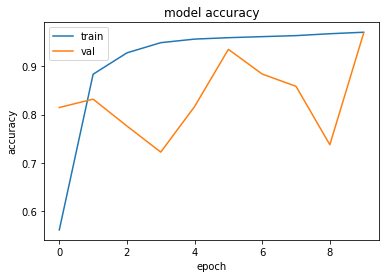

In [9]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

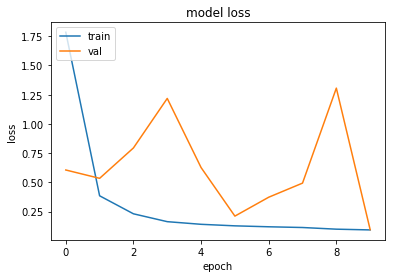

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [11]:
loss, acc = model.evaluate(X_val, y_val)
print('Accuracy: {:5.2f}%'.format(100*acc))

4920/4920 [==============================] - 1s 290us/sample - loss: 0.0955 - acc: 0.9691
Accuracy: 96.91%


In [12]:
loss, acc = model.evaluate(X_test, y_test)
print('Accuracy: {:5.2f}%'.format(100*acc))

4920/4920 [==============================] - 1s 287us/sample - loss: 0.0835 - acc: 0.9762
Accuracy: 97.62%


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  448       
_________________________________________________________________
batch_normalization_v1 (Batc multiple                  64        
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  4640      
_________________________________________________________________
batch_normalization_v1_1 (Ba multiple                  128       
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  18496     
_________________________________________________________________
batch_normalization_v1_2 (Ba multiple                  256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
__________